# Clustering with mean pooled embeddings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import umap
from sklearn.cluster import KMeans, HDBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/similar_cases/8192_embeddings.json'

df = pd.read_json(file_path)

df["mean_embedding"] = df["mean_embedding"].apply(lambda x: np.array(x, dtype=np.float32))
df["max_embedding"] = df["max_embedding"].apply(lambda x: np.array(x, dtype=np.float32))

Mounted at /content/drive


In [3]:
NUM_CLUSTERS = 10
MIN_CLUSTER_SIZE = 5

In [4]:
X = np.vstack(df["mean_embedding"].values)

pca = PCA(n_components=2)
X_mean_pca = pca.fit_transform(X)

reducer = umap.UMAP(n_components=2)
X_mean_umap = reducer.fit_transform(X)

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, max_iter=1000)
X_mean_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [5]:
kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=42, n_init=10)
df["mean_kmeans_cluster"] = kmeans.fit_predict(X)

hdb = HDBSCAN(min_cluster_size=MIN_CLUSTER_SIZE, metric="cosine")
df["mean_hdbscan_cluster"] = hdb.fit_predict(X)

In [6]:
df.head()

,opinion_id,opinion,mean_embedding,max_embedding,mean_kmeans_cluster,mean_hdbscan_cluster
0,4200405,DISTRICT COURT OF APPEAL OF THE STATE OF FLOR...,"[0.04071539, -0.015096405, 0.0143645555, -0.03...","[0.04071539, -0.015096405, 0.0143645555, -0.03...",1,-1
1,2251008,889 N.E.2d 809 (2005) 356 Ill. App.3d 1130 PEO...,"[-0.006261525, -0.016123848, -0.01349216, -0.0...","[-0.006261525, -0.016123848, -0.01349216, -0.0...",1,-1
2,4858364,"*234In re Cordes, Paul; Hurdlik, Paulette;—Pl...","[-0.007931653, 0.014965511, 0.041950665, 0.002...","[-0.007931653, 0.014965511, 0.041950665, 0.002...",9,-1
3,2790710,Twersky v Incorporated Vil. of Great Neck ( 2...,"[-0.016948689, 0.08422278, 0.0037829375, -0.01...","[-0.016948689, 0.08422278, 0.0037829375, -0.01...",2,-1
4,1470544,951 A.2d 180 (2008) Philip S. HORNER v. GOVERN...,"[0.006950893, 0.047881886, 0.045663565, -0.002...","[0.006950893, 0.047881886, 0.045663565, -0.002...",5,-1


In [7]:
df["mean_hdbscan_cluster"].nunique()

11

# Clustering with max pooled embeddings

In [8]:
X = np.vstack(df["max_embedding"].values)

pca = PCA(n_components=2)
X_max_pca = pca.fit_transform(X)

reducer = umap.UMAP(n_components=2)
X_max_umap = reducer.fit_transform(X)

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, max_iter=1000)
X_max_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [9]:
kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=42, n_init=10)
df["max_kmeans_cluster"] = kmeans.fit_predict(X)

hdb = HDBSCAN(min_cluster_size=MIN_CLUSTER_SIZE, metric="cosine")
df["max_hdbscan_cluster"] = hdb.fit_predict(X)

In [10]:
df.head()

,opinion_id,opinion,mean_embedding,max_embedding,mean_kmeans_cluster,mean_hdbscan_cluster,max_kmeans_cluster,max_hdbscan_cluster
0,4200405,DISTRICT COURT OF APPEAL OF THE STATE OF FLOR...,"[0.04071539, -0.015096405, 0.0143645555, -0.03...","[0.04071539, -0.015096405, 0.0143645555, -0.03...",1,-1,9,-1
1,2251008,889 N.E.2d 809 (2005) 356 Ill. App.3d 1130 PEO...,"[-0.006261525, -0.016123848, -0.01349216, -0.0...","[-0.006261525, -0.016123848, -0.01349216, -0.0...",1,-1,3,-1
2,4858364,"*234In re Cordes, Paul; Hurdlik, Paulette;—Pl...","[-0.007931653, 0.014965511, 0.041950665, 0.002...","[-0.007931653, 0.014965511, 0.041950665, 0.002...",9,-1,0,-1
3,2790710,Twersky v Incorporated Vil. of Great Neck ( 2...,"[-0.016948689, 0.08422278, 0.0037829375, -0.01...","[-0.016948689, 0.08422278, 0.0037829375, -0.01...",2,-1,4,-1
4,1470544,951 A.2d 180 (2008) Philip S. HORNER v. GOVERN...,"[0.006950893, 0.047881886, 0.045663565, -0.002...","[0.006950893, 0.047881886, 0.045663565, -0.002...",5,-1,5,-1


In [11]:
df["max_hdbscan_cluster"].nunique()

12

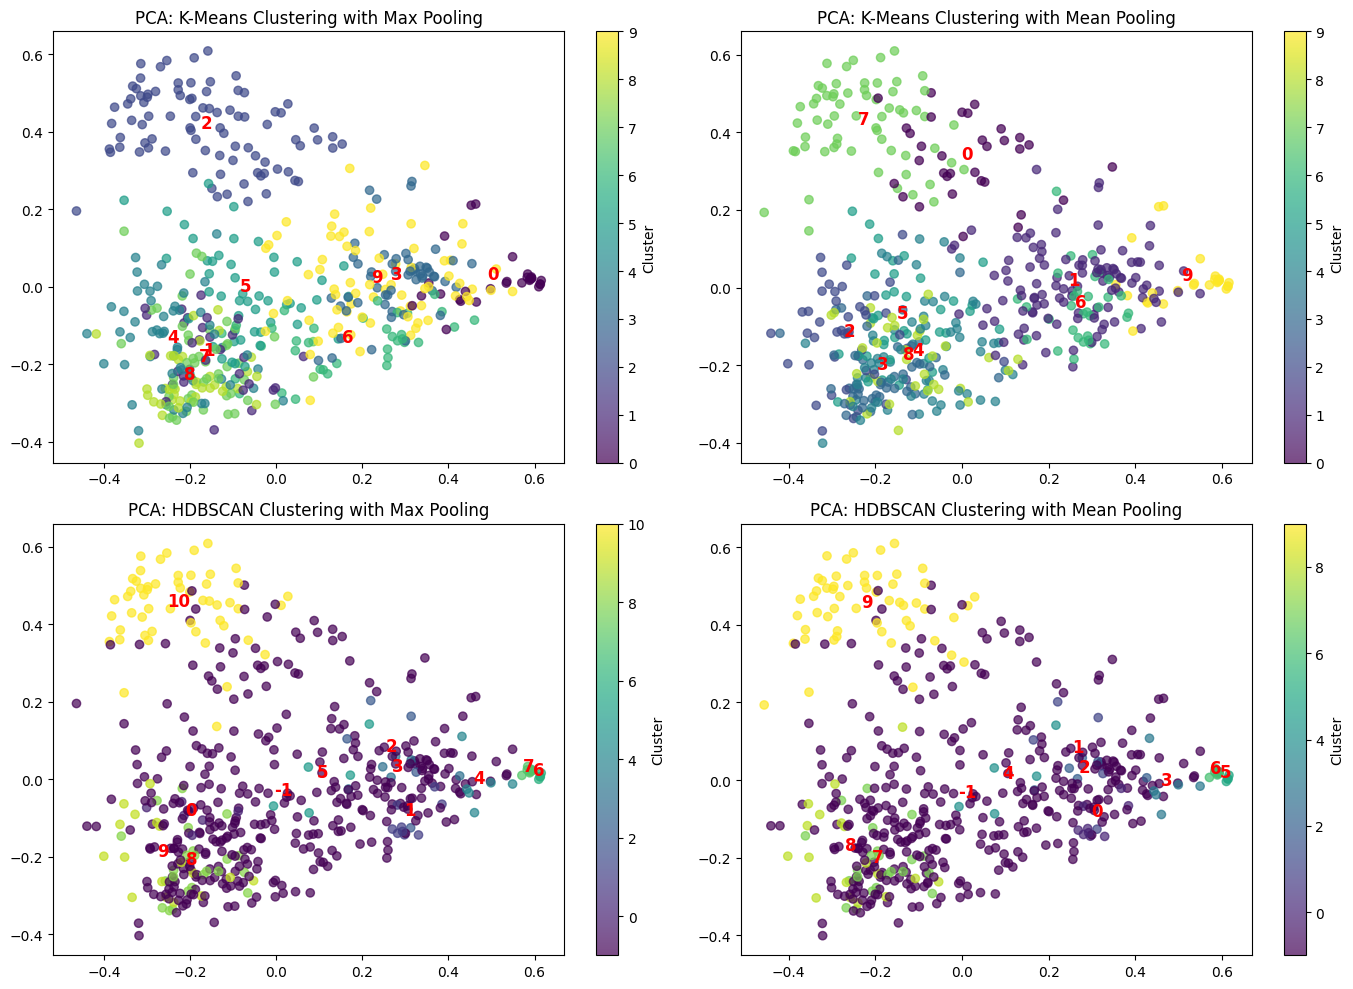

In [12]:
cluster_columns = ["max_kmeans_cluster", "mean_kmeans_cluster", "max_hdbscan_cluster", "mean_hdbscan_cluster"]
titles = ["PCA: K-Means Clustering with Max Pooling", "PCA: K-Means Clustering with Mean Pooling",
          "PCA: HDBSCAN Clustering with Max Pooling", "PCA: HDBSCAN Clustering with Mean Pooling"]


fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, cluster_col, title in zip(axes.flatten(), cluster_columns, titles):
    # Select the right PCA results
    X_pca = X_max_pca if "max" in cluster_col else X_mean_pca
    clusters = df[cluster_col]

    # Scatter plot with better color distinction
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", alpha=0.7)

    # Add cluster numbers at cluster centroids
    for cluster_id in np.unique(clusters):
        cluster_points = X_pca[clusters == cluster_id]
        centroid = np.mean(cluster_points, axis=0)
        ax.text(centroid[0], centroid[1], str(cluster_id), fontsize=12, fontweight="bold", ha="center", color="red")

    # Add colorbar and title
    fig.colorbar(scatter, ax=ax, label="Cluster")
    ax.set_title(title)

plt.tight_layout()
plt.show()

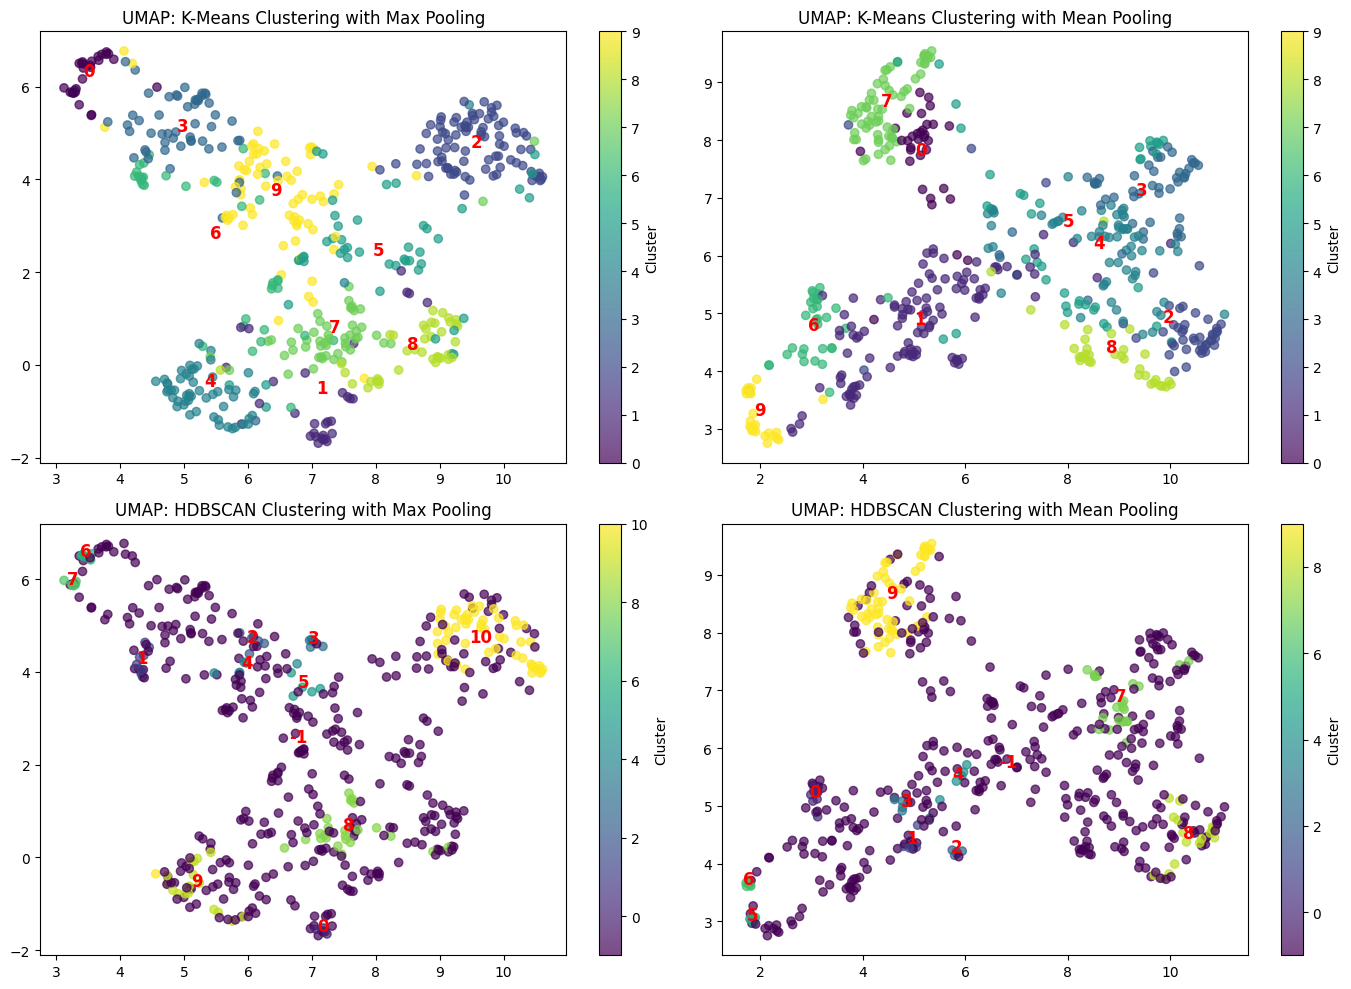

In [13]:
cluster_columns = ["max_kmeans_cluster", "mean_kmeans_cluster", "max_hdbscan_cluster", "mean_hdbscan_cluster"]
titles = ["UMAP: K-Means Clustering with Max Pooling", "UMAP: K-Means Clustering with Mean Pooling",
          "UMAP: HDBSCAN Clustering with Max Pooling", "UMAP: HDBSCAN Clustering with Mean Pooling"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, cluster_col, title in zip(axes.flatten(), cluster_columns, titles):
    # Select the right UMAP results
    X_umap = X_max_umap if "max" in cluster_col else X_mean_umap
    clusters = df[cluster_col]

    # Scatter plot with better color distinction
    scatter = ax.scatter(X_umap[:, 0], X_umap[:, 1], c=clusters, cmap="viridis", alpha=0.7)

    # Add cluster numbers at cluster centroids
    for cluster_id in np.unique(clusters):
        cluster_points = X_umap[clusters == cluster_id]
        centroid = np.mean(cluster_points, axis=0)
        ax.text(centroid[0], centroid[1], str(cluster_id), fontsize=12, fontweight="bold", ha="center", color="red")

    # Add colorbar and title
    fig.colorbar(scatter, ax=ax, label="Cluster")
    ax.set_title(title)

plt.tight_layout()
plt.show()

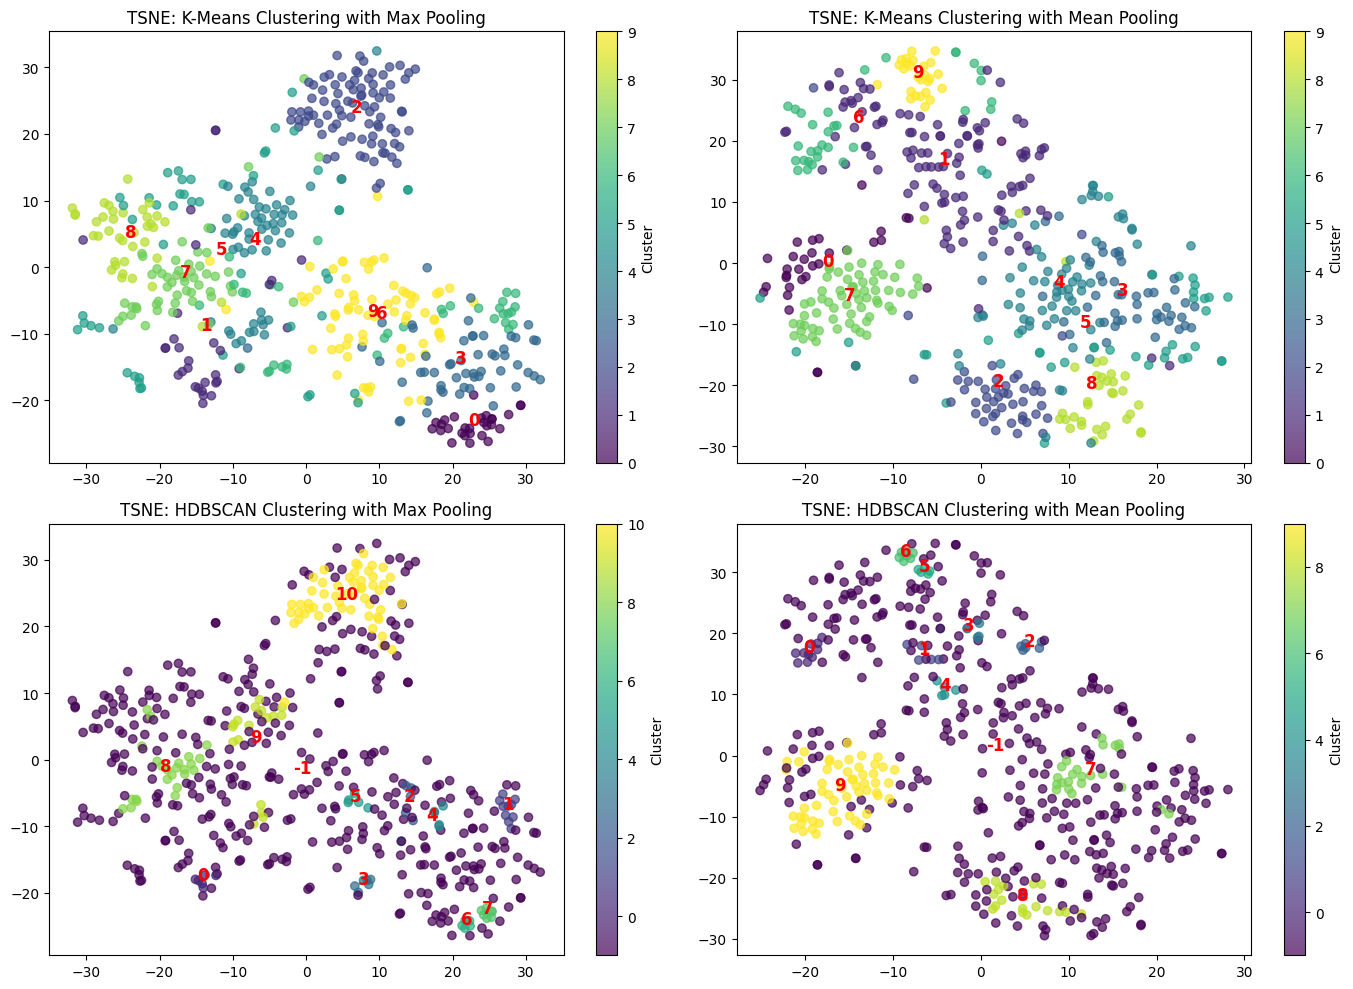

In [14]:
cluster_columns = ["max_kmeans_cluster", "mean_kmeans_cluster", "max_hdbscan_cluster", "mean_hdbscan_cluster"]
titles = ["TSNE: K-Means Clustering with Max Pooling", "TSNE: K-Means Clustering with Mean Pooling",
          "TSNE: HDBSCAN Clustering with Max Pooling", "TSNE: HDBSCAN Clustering with Mean Pooling"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, cluster_col, title in zip(axes.flatten(), cluster_columns, titles):
    # Select the right TSNE results
    X_tsne = X_max_tsne if "max" in cluster_col else X_mean_tsne
    clusters = df[cluster_col]

    # Scatter plot with better color distinction
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap="viridis", alpha=0.7)

    # Add cluster numbers at cluster centroids
    for cluster_id in np.unique(clusters):
        cluster_points = X_tsne[clusters == cluster_id]
        centroid = np.mean(cluster_points, axis=0)
        ax.text(centroid[0], centroid[1], str(cluster_id), fontsize=12, fontweight="bold", ha="center", color="red")

    # Add colorbar and title
    fig.colorbar(scatter, ax=ax, label="Cluster")
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [15]:
from google.colab import drive
drive.mount('/content/drive')

df = df[["opinion_id", "opinion", "max_kmeans_cluster", "mean_kmeans_cluster", "max_hdbscan_cluster", "mean_hdbscan_cluster"]]

file_path = '/content/drive/MyDrive/similar_cases/8192_clusters.csv'
df.to_csv(file_path, index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/MyDrive/similar_cases/8192_clusters.csv'
df = pd.read_csv(file_path)

In [11]:
df[(df["max_kmeans_cluster"] == 4) & (df["mean_kmeans_cluster"] == 2)]

,opinion_id,opinion,max_kmeans_cluster,mean_kmeans_cluster,max_hdbscan_cluster,mean_hdbscan_cluster
3,2790710,Twersky v Incorporated Vil. of Great Neck ( 2...,4,2,-1,-1
6,2193107,905 A.2d 15 (2006) 279 Conn. 682 Kathleen DUFF...,4,2,-1,-1
15,6198051,"Alfred M. Lama, J. In this case, the defendan...",4,2,-1,-1
51,6254514,"Opinion by Mr. Chief Justice Brown, The pole ...",4,2,-1,-1
96,2279347,21 Cal. App. 4th 203 (1993) 25 Cal. Rptr. 2d 8...,4,2,9,8
111,7935432,"Grant, J. It is conceded in -this case that t...",4,2,9,8
114,3678575,This was a civil action to recover on a contra...,4,2,-1,-1
128,8052496,"NADEAU, j. The defendant, Frank J. Geis d/b/a...",4,2,-1,-1
138,1764240,715 F. Supp. 688 (1989) TERRA NOVA INSURANCE C...,4,2,9,8
142,7688844,"| ]WALTZER, Judge. This is an appeal from a j...",4,2,9,8


In [13]:
df[(df["max_kmeans_cluster"] == 2) & (df["mean_kmeans_cluster"] == 7)]

,opinion_id,opinion,max_kmeans_cluster,mean_kmeans_cluster,max_hdbscan_cluster,mean_hdbscan_cluster
5,1083484,IN THE COURT OF CRIMINAL APPEALS OF TENNESSEE...,2,7,10,9
7,3516995,* Corpus Juris-Cyc. References: Indictments an...,2,7,-1,-1
9,2729050,"Pursuant to Ind. Appellate Rule 65(D), this Me...",2,7,10,9
23,9627650,"JOHNSON, J., concurring. In the Penal Code, t...",2,7,-1,-1
34,1355714,112 Wash. 2d 303 (1989) 771 P.2d 350 THE STATE...,2,7,-1,9
...,...,...,...,...,...,...
453,2681985,Filed 7/3/14 P. v. Abdul-Jaami CA1/1 NOT TO BE...,2,7,10,9
464,9719932,"DUNN, J., Concurring and Dissenting.—I concur...",2,7,-1,-1
477,2832035,NOT PRECEDENTIAL UNITED STATES COURT OF APPEA...,2,7,10,9
492,3155820,People v Roberson (2015 NY Slip Op 08444) Peo...,2,7,10,9


In [15]:
df[(df["max_kmeans_cluster"] == 0) & (df["mean_kmeans_cluster"] == 9)]

,opinion_id,opinion,max_kmeans_cluster,mean_kmeans_cluster,max_hdbscan_cluster,mean_hdbscan_cluster
2,4858364,"*234In re Cordes, Paul; Hurdlik, Paulette;—Pl...",0,9,-1,-1
17,8388881,Petition for writ of certiorari to the Court o...,0,9,-1,-1
21,8940245,Supreme Court of Appeals of Virginia. Certior...,0,9,-1,-1
32,9060053,C. A. 9th Cir. Certiorari denied.,0,9,7,6
37,8143875,Petition for a writ of certiorari to the Circ...,0,9,6,5
81,9126946,Ct. Crim. App. Okla. Certiorari denied.,0,9,-1,-1
90,9079900,C. A. 5th Cir. Certiorari denied.,0,9,7,6
93,7275037,Petition for writ of certiorari to the United...,0,9,6,5
102,8928102,*828C. A. 2d Cir. Certiorari denied.,0,9,7,6
117,7646006,Cert. denied.,0,9,-1,-1
